In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [2]:
bitcoin = pd.read_csv('bitcoin.csv', on_bad_lines='skip')
bitcoin = bitcoin[::-1].reset_index(drop=True)
print(bitcoin.info())
bitcoin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633975 entries, 0 to 633974
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    633975 non-null  object 
 1   open    633975 non-null  int64  
 2   high    633975 non-null  int64  
 3   low     633975 non-null  float64
 4   close   633974 non-null  float64
 5   volume  633974 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 29.0+ MB
None


,date,open,high,low,close,volume
0,2017-09-30T10:25:00,4759000,4766000,4754000.0,4766000.0,1723251.689
1,2017-09-30T10:30:00,4764000,4766000,4753000.0,4753000.0,67895.498
2,2017-09-30T10:35:00,4758000,4763000,4757000.0,4763000.0,1426930.014
3,2017-09-30T10:40:00,4755000,4767000,4755000.0,4767000.0,64425.487
4,2017-09-30T10:45:00,4761000,4767000,4759000.0,4761000.0,41299.507


In [3]:
bitcoin.corr()['volume']

<ipython-input-3-3b8259c97b5e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bitcoin.corr()['volume']


open      0.415439
high      0.416830
low       0.414086
close     0.415445
volume    1.000000
Name: volume, dtype: float64

In [4]:
# np.exp(np.log(bitcoin)).diff().cumsum()

In [5]:
bitcoin['date'] = bitcoin['date'].apply(lambda x: x.split('T')[0]+' '+x.split('T')[1])
bitcoin = bitcoin.drop(603427).reset_index(drop=True)
bitcoin['date'] = pd.to_datetime(bitcoin.date , format = '%Y-%m-%d %H:%M:%S')
bitcoin.index = bitcoin.date
bitcoin = bitcoin.drop(columns='date')
bitcoin = np.log(bitcoin)
bitcoin = bitcoin[~bitcoin.index.duplicated()]
bitcoin

,open,high,low,close,volume
date,,,,,
2017-09-30 10:25:00,15.375548,15.377018,15.374497,15.377018,14.359724
2017-09-30 10:30:00,15.376598,15.377018,15.374287,15.374287,11.125725
2017-09-30 10:35:00,15.375338,15.376388,15.375128,15.376388,14.171036
2017-09-30 10:40:00,15.374707,15.377228,15.374707,15.377228,11.073265
2017-09-30 10:45:00,15.375968,15.377228,15.375548,15.375968,10.628606
...,...,...,...,...,...
2023-05-04 23:35:00,17.469151,17.469281,17.468581,17.469255,18.678972
2023-05-04 23:40:00,17.469255,17.469695,17.468452,17.468452,19.353800
2023-05-04 23:45:00,17.468452,17.468711,17.467467,17.467700,19.591731


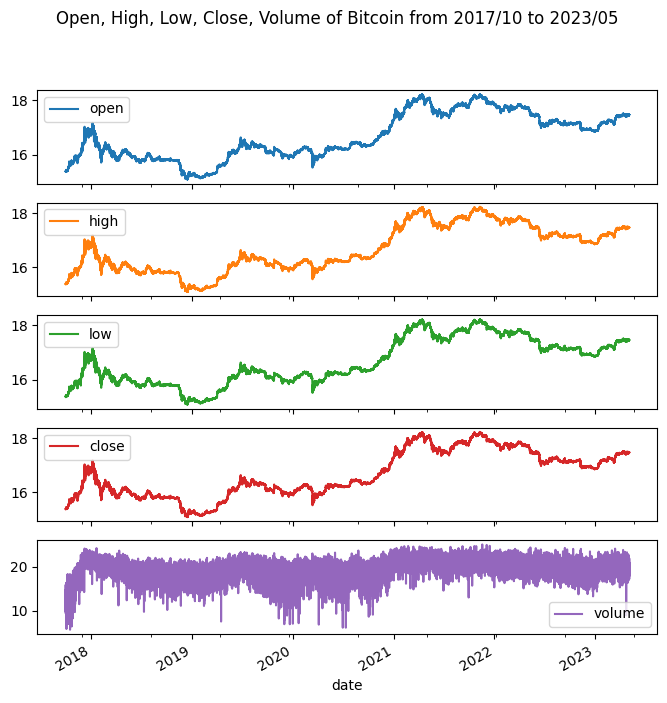

In [6]:
bitcoin.plot(subplots = True, figsize = (8, 8))
plt.legend(loc = 'best')
plt.suptitle('Open, High, Low, Close, Volume of Bitcoin from 2017/10 to 2023/05', fontsize=12, color='black')
plt.show()

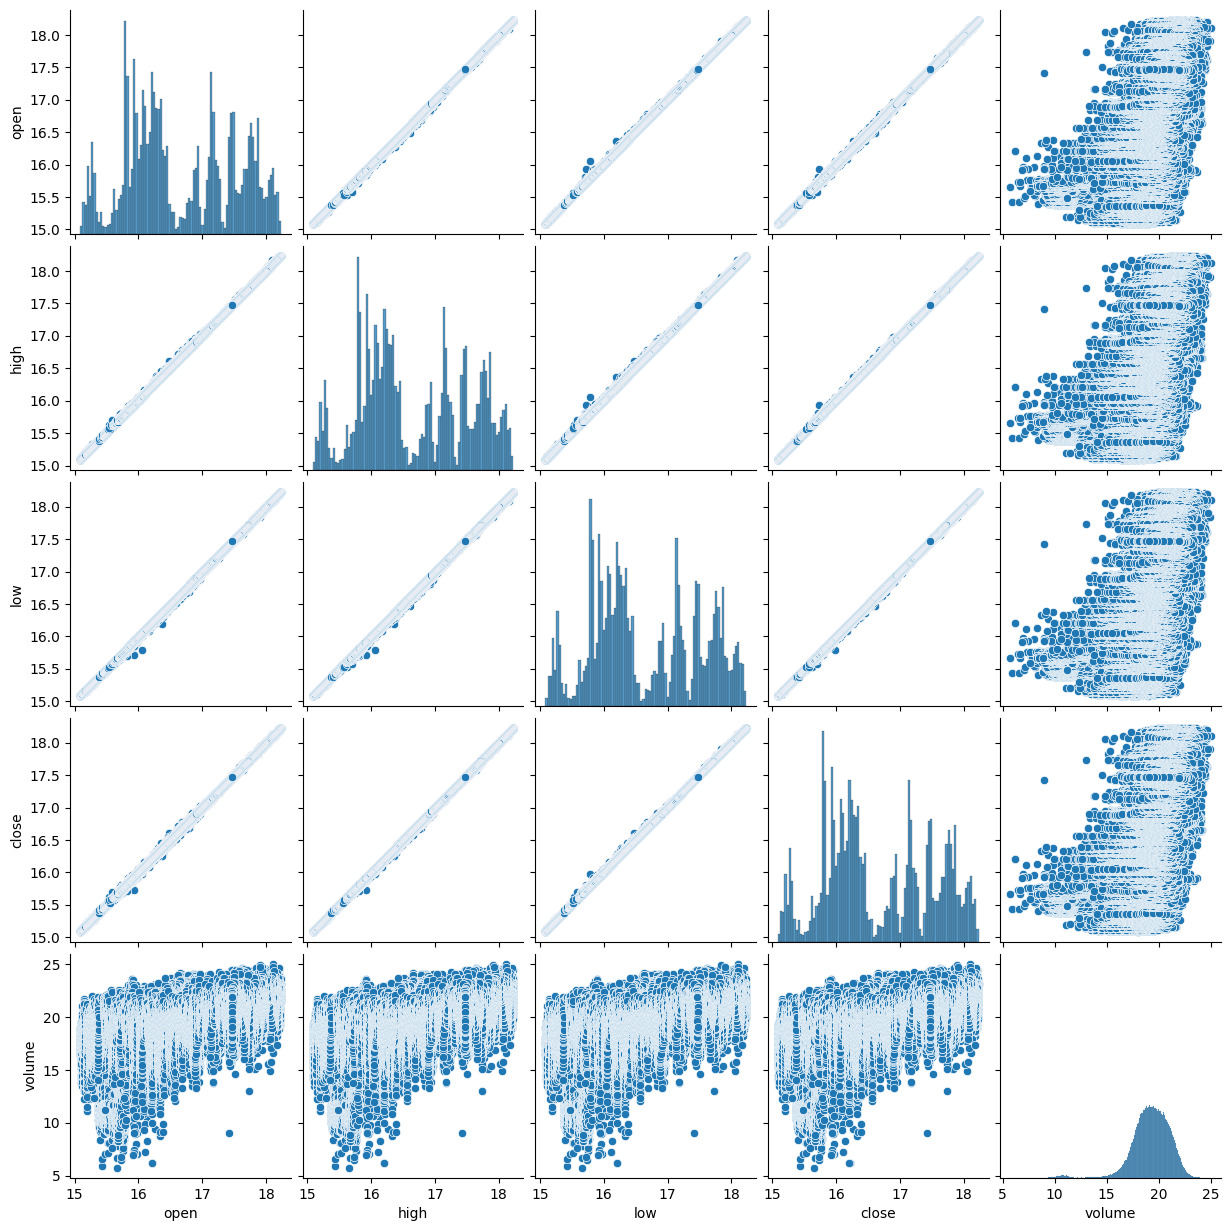

In [7]:
sns.pairplot(bitcoin)

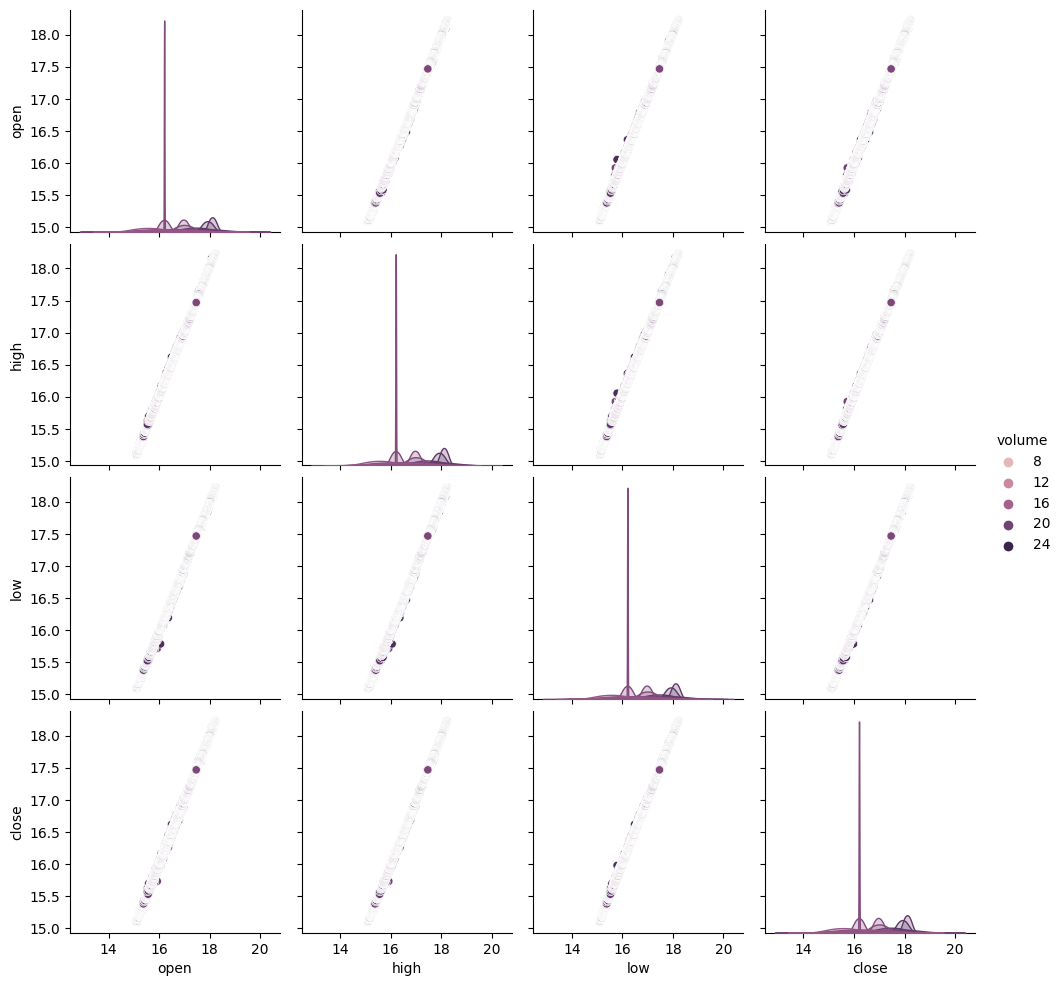

In [8]:
sns.pairplot(bitcoin, hue="volume")

In [18]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR

bitcoin = bitcoin.dropna()
print(coint_johansen(bitcoin,-1,1).eig)

#creating the train and validation set
train = bitcoin[:int(0.8*(len(bitcoin)))]
valid = bitcoin[int(0.8*(len(bitcoin))):]

#fit the model
model = VAR(endog=train)

for i in list(range(10)):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

[4.79705045e-01 3.08608232e-01 7.86564515e-02 2.99171582e-02
 1.99646198e-06]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Lag Order = 0
AIC :  -37.03011646542094
BIC :  -37.02999856333168
FPE :  8.279893578511852e-17
HQIC:  -37.03008299941402 

Lag Order = 1
AIC :  -53.00860123012984
BIC :  -53.007893816222214
FPE :  9.520439385975787e-24
HQIC:  -53.00840043368103 

Lag Order = 2
AIC :  -53.24710403302306
BIC :  -53.24580710501028
FPE :  7.500263841829366e-24
HQIC:  -53.246735905453555 

Lag Order = 3
AIC :  -53.34133222052853
BIC :  -53.33944577612381
FPE :  6.825803146760982e-24
HQIC:  -53.340796761159524 

Lag Order = 4
AIC :  -53.388353378435994
BIC :  -53.385877415352525
FPE :  6.512274973189499e-24
HQIC:  -53.38765058658868 

Lag Order = 5
AIC :  -53.41672155468062
BIC :  -53.413656070631575
FPE :  6.330129392985129e-24
HQIC:  -53.41585142967617 

Lag Order = 6
AIC :  -53.43743430369596
BIC :  -53.433779296394505
FPE :  6.2003635545471455e-24
HQIC:  -53.43639684485555 

Lag Order = 7
AIC :  -53.448753960395536
BIC :  -53.44450942755481
FPE :  6.13057331369481e-24
HQIC:  -53.44754916704034 

Lag Orde

In [19]:
x = model.select_order(maxlags=10)
x.summary()

,AIC,BIC,FPE,HQIC
0,-37.03,-37.03,8.278e-17,-37.03
1,-53.01,-53.01,9.519e-24,-53.01
2,-53.25,-53.25,7.499e-24,-53.25
3,-53.34,-53.34,6.825e-24,-53.34
4,-53.39,-53.39,6.512e-24,-53.39
5,-53.42,-53.41,6.330e-24,-53.42
6,-53.44,-53.43,6.200e-24,-53.44
7,-53.45,-53.44,6.130e-24,-53.45
8,-53.46,-53.45,6.078e-24,-53.46
9,-53.46,-53.46,6.038e-24,-53.46


In [20]:
# make prediction on validation
model_fitted = model.fit(100)
prediction = model_fitted.forecast(model_fitted.endog, steps=len(valid))
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 06, May, 2023
Time:                     18:04:24
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -53.4605
Nobs:                     468860.    HQIC:                  -53.5028
Log likelihood:       9.22267e+06    FPE:                5.71159e-24
AIC:                     -53.5195    Det(Omega_mle):     5.68117e-24
--------------------------------------------------------------------
Results for equation open
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.000084         0.000024           -3.473           0.001
L1.open            -0.047260         0.001580          -29.903           0.000
L1.high             0.089881         0.001047           85.836       

In [21]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)
def adjust(val, length= 6): return str(val).ljust(length)
for col, val in zip(bitcoin.columns, out):
    print(adjust(col), ':', round(val, 2))

open   : 2.0
high   : 2.0
low    : 2.0
close  : 2.0
volume : 2.0


In [22]:
#converting predictions to dataframe
pred = pd.DataFrame(data=prediction,columns=bitcoin.columns)
pred = np.exp(pred)
pred.index = valid.index

valid = np.exp(valid)
#check rmse
for col in bitcoin.columns:
    print('rmse value for', col, 'is : ', np.sqrt(mean_squared_error(pred[col], valid[col])))

#make final predictions
model = VAR(endog=bitcoin)
model_fit = model.fit()
num_steps_forecast = int(0.2*(len(bitcoin)))
yhat = np.exp(model_fit.forecast(model_fit.endog, steps=num_steps_forecast))

rmse value for open is :  25058056.32938326
rmse value for high is :  25115522.22700988
rmse value for low is :  24999657.691818934
rmse value for close is :  25057273.864409503
rmse value for volume is :  1184326081.9753575


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [24]:
pd.DataFrame(yhat - valid.values).describe()

,0,1,2,3,4
count,1.172400e+05,1.172400e+05,1.172400e+05,1.172400e+05,1.172400e+05
mean,4.787426e+06,4.806564e+06,4.767750e+06,4.787195e+06,1.942489e+07
std,8.400152e+06,8.407492e+06,8.392657e+06,8.400021e+06,9.341731e+08
min,-1.914412e+07,-1.913068e+07,-1.917931e+07,-1.914469e+07,-3.756043e+10
25%,-6.181233e+05,-6.071569e+05,-6.297487e+05,-6.181690e+05,-7.862072e+07
50%,7.609927e+06,7.632333e+06,7.587203e+06,7.611382e+06,2.790480e+08
75%,1.012188e+07,1.013938e+07,1.010553e+07,1.012120e+07,4.645785e+08
max,1.582202e+07,1.584001e+07,1.582152e+07,1.582348e+07,6.879250e+08


In [26]:
valid.describe()

,open,high,low,close,volume
count,1.172400e+05,1.172400e+05,1.172400e+05,1.172400e+05,1.172400e+05
mean,3.232581e+07,3.235741e+07,3.229423e+07,3.232548e+07,6.426399e+08
std,8.762128e+06,8.770309e+06,8.753807e+06,8.761968e+06,9.355079e+08
min,2.075000e+07,2.078200e+07,2.070000e+07,2.074800e+07,7.999768e+03
25%,2.724900e+07,2.727900e+07,2.721400e+07,2.724800e+07,1.961271e+08
50%,2.922400e+07,2.925100e+07,2.919600e+07,2.922300e+07,3.835236e+08
75%,3.739100e+07,3.742900e+07,3.735500e+07,3.739100e+07,7.419751e+08
max,5.767400e+07,5.767800e+07,5.765600e+07,5.767400e+07,3.824703e+10


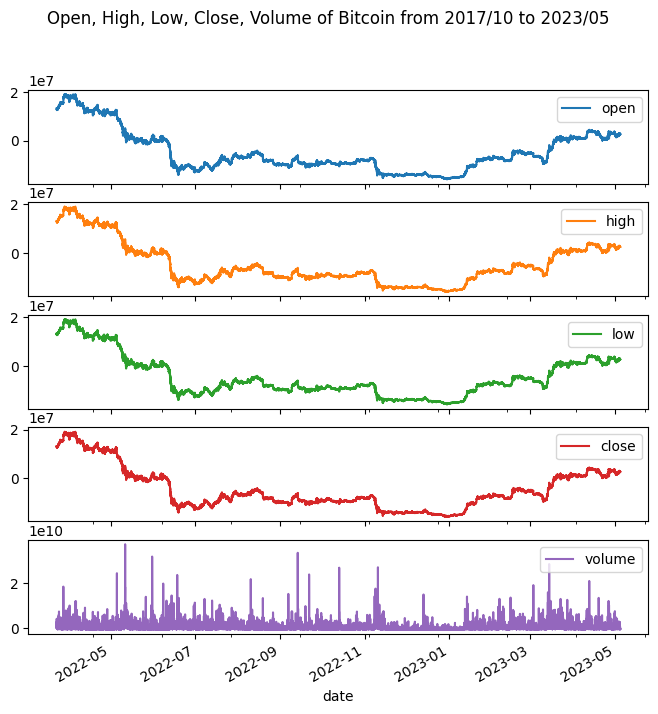

In [28]:
(valid-yhat).plot(subplots = True, figsize = (8, 8))
plt.legend(loc = 'best')
plt.suptitle('Open, High, Low, Close, Volume of Bitcoin from 2017/10 to 2023/05', fontsize=12, color='black')
plt.show()